In [128]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [129]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier

In [130]:
from sklearn.preprocessing import LabelEncoder

In [131]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn.tree import plot_tree

In [132]:
from sklearn.tree import export_graphviz

In [133]:
# pip install seaborn
import pandas as pd
import numpy as np
import time
import re
from sklearn.impute import SimpleImputer
from sklearn.datasets import load_iris
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [134]:
dataset = pd.read_csv("Final_merged_data.csv", sep=",")
dataset

,Year,Country,Item,Rainfall (mm),Temperature (Celcius),Yield (hg/ha),Pesticides (Tons)
0,2010,Indonesia,"Abaca, manila hemp, raw",190.783333,26.6,8275,313639.25
1,2010,Indonesia,Areca nuts,190.783333,26.6,12623,313639.25
2,2010,Indonesia,Avocados,190.783333,26.6,109367,313639.25
3,2010,Indonesia,Bananas,190.783333,26.6,568256,313639.25
4,2010,Indonesia,"Beans, dry",190.783333,26.6,11300,313639.25
...,...,...,...,...,...,...,...
715,2021,Indonesia,Tea leaves,199.550000,26.8,50244,283297.13
716,2021,Indonesia,Tomatoes,199.550000,26.8,187605,283297.13
717,2021,Indonesia,Unmanufactured tobacco,199.550000,26.8,11544,283297.13
718,2021,Indonesia,"Vanilla, raw",199.550000,26.8,1528,283297.13


In [135]:
enc = LabelEncoder()

In [136]:
dataset['Year'] = enc.fit_transform(dataset['Year'].values)
dataset['Country'] = enc.fit_transform(dataset['Country'].values)
dataset['Item'] = enc.fit_transform(dataset['Item'].values)
dataset['Rainfall (mm)'] = enc.fit_transform(dataset['Rainfall (mm)'].values)
dataset['Temperature (Celcius)'] = enc.fit_transform(dataset['Temperature (Celcius)'].values)
dataset['Yield (hg/ha)'] = enc.fit_transform(dataset['Yield (hg/ha)'].values)
dataset['Pesticides (Tons)'] = enc.fit_transform(dataset['Pesticides (Tons)'].values)

In [137]:
dataset

,Year,Country,Item,Rainfall (mm),Temperature (Celcius),Yield (hg/ha),Pesticides (Tons)
0,0,0,0,7,1,156,9
1,0,0,1,7,1,223,9
2,0,0,2,7,1,443,9
3,0,0,3,7,1,662,9
4,0,0,4,7,1,198,9
...,...,...,...,...,...,...,...
715,11,0,55,9,3,296,7
716,11,0,56,9,3,589,7
717,11,0,57,9,3,206,7
718,11,0,58,9,3,7,7


In [138]:
feature = ['Year', 'Country', 'Item', 'Rainfall (mm)', 'Temperature (Celcius)', 'Pesticides (Tons)', 'Yield (hg/ha)']

In [139]:
features_classification = ['Year', 'Country', 'Item']
features_regression = ['Rainfall (mm)', 'Temperature (Celcius)', 'Pesticides (Tons)']
target_variable = 'Yield (hg/ha)'

In [140]:
X = dataset[feature]
X

,Year,Country,Item,Rainfall (mm),Temperature (Celcius),Pesticides (Tons),Yield (hg/ha)
0,0,0,0,7,1,9,156
1,0,0,1,7,1,9,223
2,0,0,2,7,1,9,443
3,0,0,3,7,1,9,662
4,0,0,4,7,1,9,198
...,...,...,...,...,...,...,...
715,11,0,55,9,3,7,296
716,11,0,56,9,3,7,589
717,11,0,57,9,3,7,206
718,11,0,58,9,3,7,7


In [141]:
Y = dataset['Yield (hg/ha)']
Y

0      156
1      223
2      443
3      662
4      198
      ... 
715    296
716    589
717    206
718      7
719    511
Name: Yield (hg/ha), Length: 720, dtype: int64

In [142]:
print("Shape of X:", X.shape)
print("Shape of Y:", Y.shape)

Shape of X: (720, 7)
Shape of Y: (720,)


In [143]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
print("Line executed")

Line executed


In [144]:
label_le = LabelEncoder()
Y_encoded = label_le.fit_transform(Y)

In [145]:
X_class, X_reg, y = dataset[features_classification], dataset[features_regression], dataset[target_variable]
X_class_train, X_class_test, X_reg_train, X_reg_test, y_train, y_test = train_test_split(
    X_class, X_reg, y, test_size=0.2, random_state=42
)

In [146]:
regressor = DecisionTreeRegressor()
regressor.fit(X_train, Y_train)
Y_pred = regressor.predict(X_test)

In [147]:
classifier = DecisionTreeClassifier()
classifier.fit(X_class_train, y_train)

DecisionTreeClassifier()

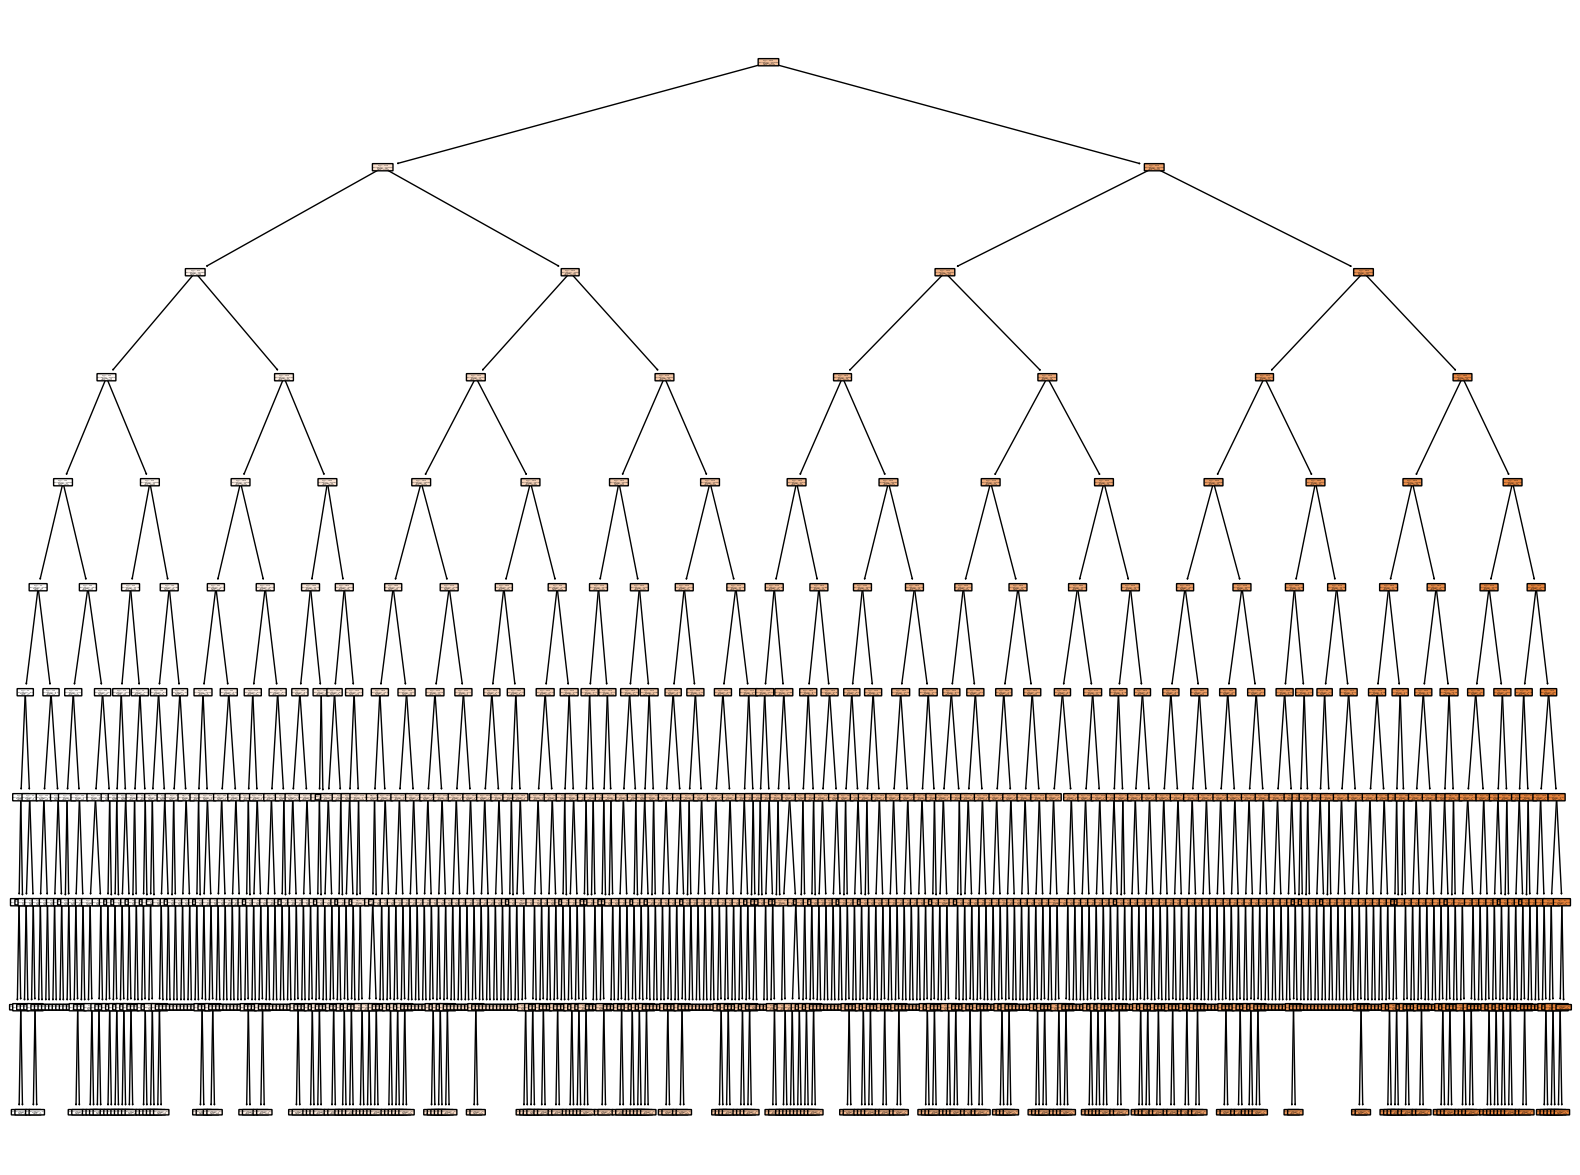

In [148]:
plt.figure(figsize=(20, 15))
plot_tree(regressor, filled=True, rounded=True)
plt.show()

In [149]:
#from sklearn.tree import export_graphviz
#import graphviz

In [150]:
#regressor = DecisionTreeRegressor()
#regressor.fit(X_train, Y_train)

In [151]:
#output_file_path = "decision_tree.dot"

In [152]:
#feature_names = ['Year', 'Country', 'Item', 'Rainfall (mm)', 'Temperature (Celcius)', 'Pesticides (Tons)', 'Yield (hg/ha)']

In [153]:
#export_graphviz(regressor, out_file=output_file_path,
#                filled=True, rounded=True, feature_names=feature_names)


In [154]:
#with open(output_file_path) as f:
#    dot_graph = f.read()


In [155]:
#graph = graphviz.Source(dot_graph)
#output_image_path = "decision_tree.png"
#graph.render(output_image_path, format='png', cleanup=True)

In [156]:
#graph.view()

In [157]:
#regressor = DecisionTreeRegressor(max_depth=3)  # Set an appropriate value for max_depth
#regressor = DecisionTreeRegressor(max_leaf_nodes=10)  # Set an appropriate value for max_leaf_nodes
#regressor = DecisionTreeRegressor(ccp_alpha=0.01)  # Set an appropriate value for ccp_alpha

In [158]:
#graph = graphviz.Source(dot_graph)
#output_image_path = "decision_tree.png"
#graph.render(output_image_path, format='png', cleanup=True)
#graph.view()

In [159]:
#X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
#print("Line executed")

In [160]:
#atr_dataset = dataset.drop(columns = 'Yield (hg/ha)')
#atr_dataset

In [161]:
#cls_dataset = dataset['Yield (hg/ha)']
#cls_dataset

In [162]:
#xtrain, xtest, ytrain, ytest = train_test_split(atr_dataset, cls_dataset, test_size=0.2, random_state=1)
#clf = DecisionTreeClassifier()
#clf.fit(xtrain, ytrain)
#print("Line executed")

In [163]:
# Split the data into training and testing sets
#X_class, X_reg, y = dataset[features_classification], dataset[features_regression], dataset[target_variable]
#X_class_train, X_class_test, X_reg_train, X_reg_test, y_train, y_test = train_test_split(
#    X_class, X_reg, y, test_size=0.2, random_state=42)

In [164]:
#regressor = DecisionTreeRegressor()
#regressor.fit(xtrain, ytrain)

In [165]:
#predictions = clf.predict(xtest)

In [166]:
#tree_rules = export_text(clf, feature_names=list(x.columns))
#print("Decision Tree Rules:\n", tree_rules)

In [167]:
#y_pred = tree_dataset.predict(xtest)
#cm = confusion_matrix(ytest, y_pred)
#print("Confusion Matrix")
#print(cm)
#accuration = classification_report(ytest, y_pred)
#print("Level of Algorithm Accuracy")
#accuration = accuracy_score(ytest, y_pred)
#print("Level of Accutacy: %d percentage" %(accuration*100))

In [168]:
#from sklearn.tree import export_graphviz
#export_graphviz(tree_dataset, out_file="Tree_Yield(hg/ha).dot", class_names=["A","B","C","D"], feature_names=atr_dataset.columns, impurity=False, filled=True)